<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Image-Processing-with-scikit-image" data-toc-modified-id="Python-Image-Processing-with-scikit-image-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Image Processing with scikit-image</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#OBJECTIVE" data-toc-modified-id="OBJECTIVE-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>OBJECTIVE</a></span></li><li><span><a href="#EXPECTED-OUTPUT" data-toc-modified-id="EXPECTED-OUTPUT-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>EXPECTED OUTPUT</a></span></li></ul></li><li><span><a href="#Test-that-the-algorithm-works" data-toc-modified-id="Test-that-the-algorithm-works-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Test that the algorithm works</a></span><ul class="toc-item"><li><span><a href="#Set-each-alternate-pixel-to-black/white" data-toc-modified-id="Set-each-alternate-pixel-to-black/white-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Set each alternate pixel to black/white</a></span></li><li><span><a href="#Check-the-result" data-toc-modified-id="Check-the-result-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Check the result</a></span></li><li><span><a href="#Scan-with-the-5x5-window-and-output-to-.csv" data-toc-modified-id="Scan-with-the-5x5-window-and-output-to-.csv-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Scan with the 5x5 window and output to .csv</a></span></li></ul></li><li><span><a href="#Import-an-actual-720x480-image-and-process-it;-img2.jpg-can-be-used-as-well" data-toc-modified-id="Import-an-actual-720x480-image-and-process-it;-img2.jpg-can-be-used-as-well-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import an actual 720x480 image and process it; img2.jpg can be used as well</a></span></li></ul></li></ul></div>

# Python Image Processing with scikit-image


    File name: scikitimage_Project.ipynb
    Author: Alex Ragalie - aragalie.com
    Date created:       23 March 2018
    Date last modified: 23 March 2018
    Python Version: 3.6

### OBJECTIVE

The task is to use a 5x5 window to scan over a greyscaled image, where a pixel value is a float in the range 0 to 1.

The values have to be normalised so that within one window the smallest value is scaled to 0 and the largest to 1.

scikit-image must be used.


### EXPECTED OUTPUT

Export data to .csv, in a table with 25 columns and 13,824 rows.


In [120]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# JupyterNB dark theme plotting made visible
plt.style.use(['dark_background'])

from skimage.color import rgb2gray
from skimage import io

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [121]:
# Set the working directory >>>> change this to your own
os.chdir("/home/alex/DL/upwork/scikitimage_project/")

## Test that the algorithm works


In [122]:
# Load a 10x10px image
filename = 'img3.jpg'
img_test = io.imread(filename)

In [123]:
# Check the shape and RGB channels (10,10,3)
img_test.shape

(10, 10, 3)

In [124]:
# Convert the image to greyscale
img = rgb2gray(img_test)

In [125]:
# Check the shape again and confirm no RGB channels (10,10)
img.shape

(10, 10)

### Set each alternate pixel to black/white

In [126]:
# Set each alternate pixel to black/white
i = 1
for col in range(10):
    i += 1
    for row in range(10):
        if i % 2 == 0:
            img[row, col] = 0
            i += 1
        else:
            img[row, col] = 1
            i += 1
# Save the test file to disk
plt.imsave('test.png', img, cmap = plt.cm.gray)

### Check the result

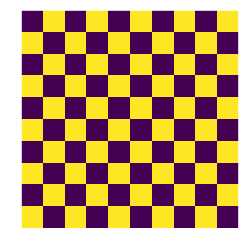

In [127]:
plt.imshow(img)

### Scan with the 5x5 window and output to .csv

In [128]:
# Create a list with all the column names
col_names_coordinate = []
i = 0 
while i < 5:
    for x in range(5):
        col_names_coordinate.append((i, x))
    i += 1

In [129]:
# Create a DataFrame to hold the output
df = pd.DataFrame(columns=col_names_coordinate)
df

,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)",...,"(3, 0)","(3, 1)","(3, 2)","(3, 3)","(3, 4)","(4, 0)","(4, 1)","(4, 2)","(4, 3)","(4, 4)"


In [130]:
# Save all pixel values in the DataFrame based on the position of the 5x5 window
df_row_number = 0
for x in range(0, img.shape[0], 5):
    for y in range(0, img.shape[1], 5):
        top_left = (x, y)
        bottom_right = (x+4, y+4)
        new_row = []
        for window_h in range(x, x+5):
            for window_w in range(y, y+5):
                new_row.append(img[window_h, window_w])
        df.loc[df_row_number] = new_row
        df_row_number += 1

In [131]:
# Check the dataframe
df

,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)",...,"(3, 0)","(3, 1)","(3, 2)","(3, 3)","(3, 4)","(4, 0)","(4, 1)","(4, 2)","(4, 3)","(4, 4)"
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [132]:
# Output the Dataframe to csv
df.to_csv('output_test.csv')

## Import an actual 720x480 image and process it; img2.jpg can be used as well

In [133]:
filename = 'img1.jpg'
img_rgb = io.imread(filename)

In [134]:
# Check the shape and RGB channels (480,720,3)
img_rgb.shape

(480, 720, 3)

In [135]:
# Convert the image to Greyscale
img = rgb2gray(img_rgb)

In [136]:
# Check the shape and the removal of the RGB channels (480,720)
img.shape

(480, 720)

In [137]:
# Create a list with all the column names
col_names_coordinate = []
i = 0
while i < 5:
    for x in range(5):
        col_names_coordinate.append((i, x))
    i += 1

In [138]:
# Create a DataFrame to hold the output
df = pd.DataFrame(columns=col_names_coordinate)
df

,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)",...,"(3, 0)","(3, 1)","(3, 2)","(3, 3)","(3, 4)","(4, 0)","(4, 1)","(4, 2)","(4, 3)","(4, 4)"


In [139]:
# Save all pixel values in the DataFrame based on the position of the 5x5 window
df_row_number = 0
for x in range(0, img.shape[0], 5):
    for y in range(0, img.shape[1], 5):
        top_left = (x, y)
        bottom_right = (x+4, y+4)
        new_row = []
        for window_h in range(x, x+5):
            for window_w in range(y, y+5):
                new_row.append(img[window_h, window_w])
        df.loc[df_row_number] = new_row
        df_row_number += 1

In [140]:
# Output the Dataframe to csv
df.to_csv('output.csv')